# Linear Regression and Gradient Descent

## 1. Linear Models and Linear Regression

### 1.1 What is Linear Regression?

Linear regression is one of the simplest forms of supervised learning. In its basic form, it models the relationship between input(s) and output by assuming a straight-line relationship:

$$
\hat{y} = XW + b
$$

Where:
- $X$ = Input features (tensor)  
- $W$ = Weights (parameters to learn)  
- $b$ = Bias term  
- $\hat{y}$ = Predicted output

### 1.2 Connection to Neural Networks

A neural network with no hidden layers and no activation functions behaves exactly like a linear regression model. It computes a weighted sum of inputs plus a bias.

> **Key Insight:**  
> Linear models are the building blocks of deep learning. If we stack multiple layers and apply activation functions, we move from simple lines to complex, nonlinear functions.

### 1.3 Real-World Examples

- Predicting house prices based on size  
- Estimating salary based on years of experience  
- Predicting concrete strength based on material composition (our dataset)

---

## 2. Mathematical Formulation of a Linear Model

The prediction formula for a linear model is:

$$
\hat{y} = XW + b
$$

Where:

| Term       | Meaning                   | Shape                 |
|:-----------|:--------------------------|:----------------------|
| $X$        | Input features matrix     | $(n, d)$              |
| $W$        | Weights vector            | $(d, 1)$              |
| $b$        | Bias (scalar or $(n, 1)$) | Scalar or broadcasted |
| $\hat{y}$  | Predicted outputs         | $(n, 1)$              |

In words:
- Multiply the input features by the weight vector.
- Add the bias.
- You get the predicted output!

---

### 2.1 Example Calculation

Suppose we have 3 data points and 2 features each:

$$
X = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix},
\quad
W = \begin{bmatrix}
0.5 \\
1.5
\end{bmatrix},
\quad
b = 2
$$

Then:

$$
\hat{y} = XW + b =
\begin{bmatrix}
6 \\
11 \\
16
\end{bmatrix}
$$


## 3. Predict Function on a Tiny Dataset

We now move from theory to a small working example using a toy dataset. We'll define a `predict(X)` function that computes:

$$
\hat{y} = XW + b
$$

Here, $W$ and $b$ are parameters we’ll learn later, but for now we’ll initialize them manually.


In [1]:
import torch

# Tiny toy dataset
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
Y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Randomly initialized weights and bias
W = torch.tensor([[0.5]], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

# Predict function
def predict(X):
    return torch.matmul(X, W) + b

# Test prediction
y_pred = predict(X)
print("Predictions:")
print(y_pred)


Predictions:
tensor([[0.5000],
        [1.0000],
        [1.5000],
        [2.0000]], grad_fn=<AddBackward0>)


## 4. Loss Functions for Regression

In supervised learning, we need a way to measure **how good or bad** our model's predictions are compared to the actual targets.  
This measurement is done using a **loss function**.

### Mean Squared Error (MSE)

The **Mean Squared Error (MSE)** is the most common loss function for **regression** tasks.

Mathematically, it is defined as:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $y_i$ = true target value  
- $\hat{y}_i$ = model prediction  
- $n$ = number of examples

✅ **In simple terms:**
- Take the **difference** between prediction and true value  
- **Square** it (to make all differences positive)  
- **Average** the result across all data points


🔵 **Other Loss Functions (just for awareness)**

- **Mean Absolute Error (MAE):** Takes the absolute difference — less sensitive to large errors

- **Huber Loss:**  A combination of MSE and MAE — more robust to outliers


In [ ]:
# Mean Squared Error (MSE) function
def mse_loss(predictions, targets):
    return torch.mean((predictions - targets)**2)

# Ground truth
Y_true = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Random predictions
Y_pred = torch.tensor([[2.5], [3.5], [5.5], [8.5]])

# Compute loss
loss = mse_loss(Y_pred, Y_true)
print("MSE Loss:", loss.item())

MSE Loss: 0.25


## 5. Preparing the Data and Model

Before we can train our model, we need to prepare two things:

1. The **data** – we must split it into training and testing sets and normalize it.
2. The **model parameters** – we must initialize the weights and bias for our linear model.

---

### 5.1 Why Normalize the Data?

The features in the Concrete dataset vary widely in scale (e.g., cement can be >500, while superplasticizer can be <5).  
These differences can lead to instability in training and large gradients.

To avoid this, we **standardize** each input feature:

- Mean = 0  
- Standard deviation = 1

This ensures the model trains smoothly and avoids issues like exploding gradients.

---

### 5.2 Why Split the Dataset?

We want our model to **generalize** to new, unseen data. To test this, we split the dataset into:

- **Training Set**: Used to learn the model parameters.
- **Test Set**: Used to evaluate model performance on unseen data.

A typical split is **80% training, 20% testing**.

---

### 5.3 Initializing the Model Parameters

We initialize:
- A **weight vector `W`** with small random values  
- A **bias term `b`** set to zero  

We also enable **gradient tracking** with `requires_grad=True` so PyTorch can compute updates during training.


In [21]:
import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv(r"D:\OneDrive\WorldQuant_DeepLearning\Nomans_Work_DL_WQU\concrete+compressive+strength\Concrete_Data.csv")

# Separate features and target
inputs = data.iloc[:, :-1].values  # 8 input features
targets = data.iloc[:, -1].values.reshape(-1, 1)  # Target column

# Normalize input features (standardization)
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

# Convert to PyTorch tensors
inputs_tensor = torch.tensor(inputs_scaled, dtype=torch.float32)
targets_tensor = torch.tensor(targets, dtype=torch.float32)

# Shuffle and split into training and test sets (80/20)
torch.manual_seed(42)
n_samples = inputs_tensor.shape[0]
indices = torch.randperm(n_samples)
split_idx = int(n_samples * 0.8)

train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

X_train = inputs_tensor[train_indices]
y_train = targets_tensor[train_indices]
X_test = inputs_tensor[test_indices]
y_test = targets_tensor[test_indices]

# Initialize model parameters
num_features = X_train.shape[1]  # Should be 8
W = torch.randn((8, 1), requires_grad=True)
W.data *= 0.01  # keep it as a leaf, but scale it
b = torch.zeros((1,), requires_grad=True)

# Print shapes for confirmation
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Weight shape:", W.shape)
print("Bias shape:", b.shape)


Training set size: 824
Test set size: 206
Weight shape: torch.Size([8, 1])
Bias shape: torch.Size([1])


## 6. Understanding Parameters in PyTorch

In linear regression, the model learns two key parameters:

- **Weights (W):** Represent the importance of each input feature
- **Bias (b):** Allows the model to shift predictions up or down

---

### 6.1 What Do the Shapes Mean?

Since we are using **8 input features** from the Concrete dataset, the parameter shapes are:

| Parameter | Shape     | Description                      |
|-----------|-----------|----------------------------------|
| `W`       | (8, 1)    | One weight per input feature     |
| `b`       | (1,)      | A single scalar bias             |

These were initialized earlier as:
```python
W = torch.randn((8, 1), requires_grad=True) * 0.01
b = torch.zeros((1,), requires_grad=True)
```

### 6.2 Why requires_grad=True?

To train the model using gradient descent, PyTorch needs to compute how the loss changes with respect to W and b. This is done using automatic differentiation.

By setting:
```python
requires_grad=True
```
PyTorch starts tracking operations on these tensors so that we can later call .backward() to compute gradients automatically.


## 7. Gradient Descent – Conceptual Overview

Once we have a model (like our linear regression setup) and a loss function (such as MSE), we need a way to **optimize the model parameters**, denoted by **ϕ**, to minimize the loss.

This is the role of **gradient descent** — one of the most fundamental optimization algorithms in machine learning.

---

### 7.1 Loss Minimization

Our goal is to make our model's predictions as close as possible to the true targets.  
We measure prediction error using a **loss function**:

$$
L[\phi] \quad \text{(scalar)}
$$

This scalar loss gets **smaller** when the model improves.

---

### 7.2 What Are Gradients?

A **gradient** tells us how much a small change in each parameter ϕ (such as weights or bias) will affect the loss.

- The **sign** tells us which direction to move.  
- The **magnitude** tells how steep the slope is.

We use this information to **move in the direction that reduces loss**.

---

### 7.3 Gradient Descent Update Rule

Each parameter is updated using the gradient of the loss:

$$
\phi \leftarrow \phi - \alpha \cdot \nabla_\phi L
$$

Where:
- $\phi$ = parameter(s) we want to learn  
- $\alpha$ = learning rate (controls step size)  
- $\nabla_\phi L$ = gradient of the loss with respect to $\phi$

---

### 7.4 Choosing a Learning Rate

| Learning Rate $\alpha$ | Effect                          |
|------------------------|----------------------------------|
| Too small              | Training is slow                 |
| Too large              | Can overshoot or diverge         |
| Just right             | Steady convergence toward minimum |

---

### 7.5 Visual Analogy

Imagine standing on a mountain trying to reach the lowest valley:

- The **gradient** tells you which way is downhill.
- The **learning rate** decides how big each step is.
- Your goal is to take careful steps downward until you reach the **lowest point** — where the **loss is minimized**.

---

> ✅ In practice: PyTorch computes gradients automatically using `.backward()`  
> We apply the gradient descent update manually in our training loop.


## 8. Training Loop – Manual Gradient Descent

### 8.1 What Is a Training Loop?

Now it's time to **put everything together**:  
We’ll manually implement a training loop that gradually updates the model parameters **ϕ = {W, b}** using **gradient descent**.

---

### 🔹 What Happens During Each Epoch?

In every training epoch, we:

1. Use the current parameters to **make predictions**.
2. Compute the **loss** (e.g., Mean Squared Error).
3. Calculate the **gradients** of the loss with respect to ϕ.
4. **Update** ϕ using gradient descent:
   $$
   \phi \leftarrow \phi - \alpha \cdot \nabla_\phi L
   $$
5. **Reset gradients** to zero before the next step.

---

During parameter updates, we wrap the code in torch.no_grad() so PyTorch does not track those operations in the computation graph.

Over many epochs, this loop should reduce the loss by gradually adjusting W and b to better values.

Now let’s implement this step-by-step in code.

In [22]:

# Set learning rate and number of training epochs
learning_rate = 0.001
epochs = 100

# Training loop
for epoch in range(epochs):
    # Forward pass: compute predictions
    y_pred = predict(X_train)
    loss = mse_loss(y_pred, y_train)

    # Backward pass: compute gradients
    loss.backward()

    # Parameter update step
    with torch.no_grad():
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad

    # Reset gradients
    W.grad.zero_()
    b.grad.zero_()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")


Epoch 10: Loss = 1523.0864
Epoch 20: Loss = 1466.9370
Epoch 30: Loss = 1413.0427
Epoch 40: Loss = 1361.3132
Epoch 50: Loss = 1311.6598
Epoch 60: Loss = 1263.9987
Epoch 70: Loss = 1218.2491
Epoch 80: Loss = 1174.3339
Epoch 90: Loss = 1132.1782
Epoch 100: Loss = 1091.7117


## 9. Plotting Training Loss Over Epochs

### 9.1 Why Plot Training Loss?

During training, it's important to **monitor the loss over time** to understand how well the model is learning.

---

### 🔹 What Does the Loss Curve Tell Us?

- If the loss **decreases smoothly**, your model is learning.
- If the loss **oscillates**, **increases**, or **stays flat**, it may indicate issues:
  - Learning rate too high or too low
  - Poor initialization
  - Bugs in the training loop

---

### 🔹 Good vs. Bad Behavior

| Behavior                     | Interpretation                     |
|-----------------------------|-------------------------------------|
| Steadily decreasing loss    | ✅ Model is learning properly        |
| Increasing or unstable loss | ⚠️ Check learning rate or gradients |
| Flat loss                   | ⚠️ Model may be stuck (not learning) |

---

### 🔹 Goal

We will:
1. Track loss values during training
2. Plot them after training using **matplotlib**


Epoch 10: Loss = 740.3594
Epoch 20: Loss = 715.5526
Epoch 30: Loss = 691.7347
Epoch 40: Loss = 668.8658
Epoch 50: Loss = 646.9078
Epoch 60: Loss = 625.8241
Epoch 70: Loss = 605.5796
Epoch 80: Loss = 586.1406
Epoch 90: Loss = 567.4748
Epoch 100: Loss = 549.5510
Epoch 110: Loss = 532.3395
Epoch 120: Loss = 515.8117
Epoch 130: Loss = 499.9404
Epoch 140: Loss = 484.6992
Epoch 150: Loss = 470.0626
Epoch 160: Loss = 456.0068
Epoch 170: Loss = 442.5083
Epoch 180: Loss = 429.5450
Epoch 190: Loss = 417.0952
Epoch 200: Loss = 405.1386
Epoch 210: Loss = 393.6553
Epoch 220: Loss = 382.6264
Epoch 230: Loss = 372.0339
Epoch 240: Loss = 361.8603
Epoch 250: Loss = 352.0888
Epoch 260: Loss = 342.7033
Epoch 270: Loss = 333.6886
Epoch 280: Loss = 325.0298
Epoch 290: Loss = 316.7128
Epoch 300: Loss = 308.7237
Epoch 310: Loss = 301.0497
Epoch 320: Loss = 293.6781
Epoch 330: Loss = 286.5969
Epoch 340: Loss = 279.7947
Epoch 350: Loss = 273.2603
Epoch 360: Loss = 266.9829
Epoch 370: Loss = 260.9523
Epoch 380:

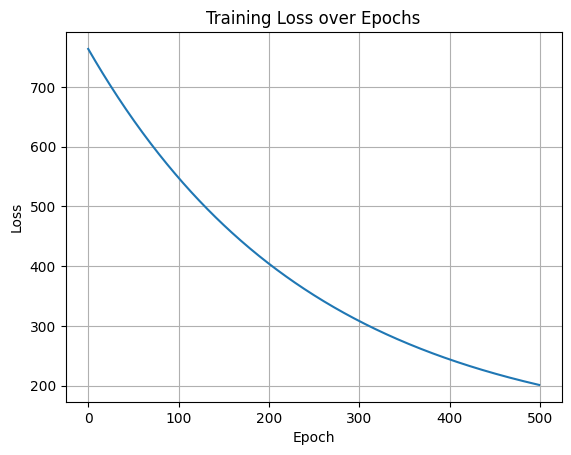

In [24]:
import matplotlib.pyplot as plt

# Initialize list to store loss values
losses = []

# Training loop
learning_rate = 0.001
epochs = 500

for epoch in range(epochs):
    y_pred = predict(X_train)
    loss = mse_loss(y_pred, y_train)
    losses.append(loss.item())  # Track the loss

    loss.backward()

    with torch.no_grad():
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad

    W.grad.zero_()
    b.grad.zero_()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()


✅ This plot helps us understand whether our training procedure is working and whether the learning rate and model parameters are reasonable.

## 10. Evaluating Model Performance

After training, we evaluate our model on **unseen data** to check how well it generalizes.

We use the **test set** for this purpose — it was never shown to the model during training.

---

### 10.1 Why Test the Model?

Training loss tells us how well the model fits the training data.  
But a model that performs well on the training set might still perform poorly on new data — this is called **overfitting**.

Evaluating on a separate **test set** gives us an estimate of **true model performance**.

---

### 🔹 Steps for Evaluation:

1. Use the final trained model to **predict on `X_test`**
2. Compute the **Mean Squared Error** using `mse_loss()`
3. Compare it with training loss to detect:
   - Underfitting (both losses high)
   - Overfitting (train loss low, test loss high)
   - Generalization (both reasonably low)


In [25]:
# Evaluate the model on test set

# Predict on test data
y_test_pred = predict(X_test)

# Compute test loss
test_loss = mse_loss(y_test_pred, y_test)

# Print test loss
print(f"Test Loss: {test_loss.item():.4f}")


Test Loss: 197.5291


> ✅ A small test loss indicates good generalization.  
> If the test loss is much higher than the training loss, the model may have overfitted.


## 11. Reflection and Summary

We’ve now completed a full walk-through of **manual linear regression using PyTorch**:

---

### 🔹 What We Built

- A linear model: $\hat{y} = XW + b$
- A loss function: **Mean Squared Error (MSE)**
- A training loop with:
  - Gradient computation using `.backward()`
  - Parameter updates using gradient descent
  - Loss tracking and visualization

---

### 🔹 What We Learned

| Concept                   | Insight                                                        |
|---------------------------|----------------------------------------------------------------|
| Linear Regression         | The foundation of all deep learning models                     |
| PyTorch Tensors           | Used to represent inputs, targets, weights, and gradients      |
| Gradient Descent          | Optimizes model parameters by minimizing loss                  |
| Training/Test Split       | Essential for evaluating generalization                        |
| Loss Curve                | Visual tool to monitor learning progress                       |
| Evaluation                | Helps detect underfitting, overfitting, or good generalization |

---

### 🔹 Why This Matters

This notebook builds intuition for **what neural networks are doing under the hood**.  
In fact, a neural network with no hidden layers is **just a linear model**.

> ✅ Understanding this foundation prepares us for adding **non-linearity**, **hidden layers**, and building full **neural networks** in the next notebook.

---

### 🔜 Coming Up Next

In the next notebook, we will:
- Learn why linear models are **not enough** for most real-world tasks
- Introduce **activation functions** (like ReLU)
- Build a network with **a hidden layer**

We’re now ready to move **from lines to layers**.
